In [1]:
import pandas as pd
import numpy as np

In [5]:
# till now
# timestamp
pd.Timestamp('5th Jan 2022 8:10').hour
# DatetimeIndex -> collection of timestamp -> are usually df and series index
pd.DatetimeIndex([pd.Timestamp('5th Jan 2022 8:10'),pd.Timestamp('7th Jan 2022 8:10'),pd.Timestamp('8th Jan 2022 8:10')])
# date_range()
pd.date_range(start='2023-1-6',end='2023-1-21',freq='D')
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
pd.to_datetime(s).dt.year

0    2023
1    2023
2    2023
dtype: int64

### Timedelta Object

Represents a duration, the difference between two dates or times.

In [7]:
# create using Timestamp objects
t1 = pd.Timestamp('6th Jan 2023 8:20:14')
t2 = pd.Timestamp('26th Jan 2023 10:00:00')

t2-t1

Timedelta('20 days 01:39:46')

In [10]:
# standalone creation
pd.Timedelta(days=2,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [12]:
# Arthimetic
pd.Timestamp('6 Jan 2023') + pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2023-01-08 10:35:00')

In [14]:
pd.date_range(start='1 Jan 2022', end='10 Jan 2022', freq='D') + pd.Timedelta(days=2)

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# real life example
df = pd.read_csv('deliveries.csv')
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [17]:
df.shape

(501, 2)

In [19]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [21]:
df['delta'] = df['delivery_date'] - df['order_date']
df.head()

,order_date,delivery_date,delta
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days


In [22]:
df['delta'].mean()

Timedelta('1217 days 22:53:53.532934128')

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [124]:
google = pd.read_csv('google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [125]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [126]:
google['Date'] = pd.to_datetime(google['Date'])

In [127]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [128]:
google.set_index('Date',inplace=True)

In [129]:
google.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874


In [130]:
# fetch a specific date
google.loc['2007-10-30']

Open         3.374900e+02
High         3.486482e+02
Low          3.374900e+02
Close        3.460878e+02
Adj Close    3.460878e+02
Volume       1.385293e+07
Name: 2007-10-30 00:00:00, dtype: float64

In [131]:
# filtering by year and month 
google.loc['2021']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900
2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300
2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100
2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000
2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600
...,...,...,...,...,...,...
2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200
2021-12-29,2928.590088,2943.675049,2910.090088,2930.090088,2930.090088,851100


In [132]:
# create year month-name and day-name
google['month_name'] = google.index.month_name()
google['weekday_name'] = google.index.day_name()
google['quarter'] = google.index.quarter

In [133]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


In [134]:
# slicing
# loc has first and last value as such unlike iloc 
google.loc['2021-12-15':'2021-12-20']

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2021-12-15,2887.320068,2950.344971,2854.110107,2947.370117,2947.370117,1364000,December,Wednesday,4
2021-12-16,2961.540039,2971.030029,2881.850098,2896.770020,2896.770020,1370000,December,Thursday,4
2021-12-17,2854.290039,2889.201904,2835.760010,2856.060059,2856.060059,2170200,December,Friday,4
2021-12-20,2813.592041,2852.209961,2805.000000,2848.030029,2848.030029,1013200,December,Monday,4


In [135]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta
years = pd.date_range(start='2005-01-06',end='2022-01-06',freq=pd.DateOffset(years=1))

google[google.index.isin(years)]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


<AxesSubplot:xlabel='Date'>

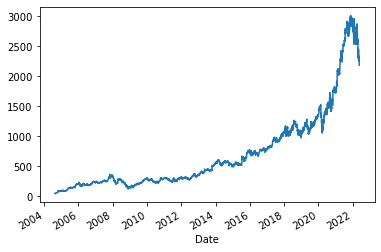

In [136]:
# viz a single col
google['Close'].plot()

<AxesSubplot:xlabel='Date'>

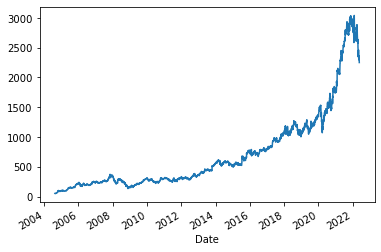

In [137]:
google['High'].plot()

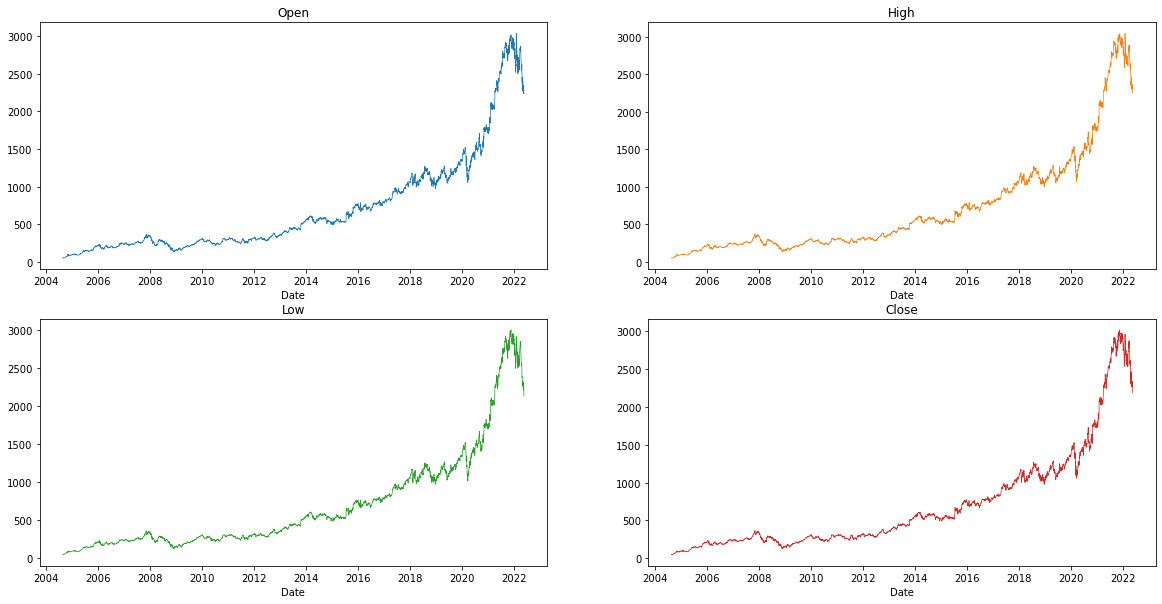

In [138]:
# viz all col
google_graph = google[['Open','High','Low','Close']]
ax = google_graph.plot(subplots=True,
                    layout=(2, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,10),
                 title = ['Open','High','Low','Close'])

<AxesSubplot:xlabel='Date'>

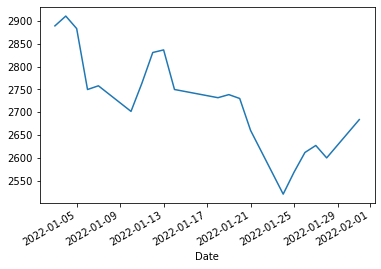

In [139]:
# plot for a particular year/month/week
google.loc['2022-01']['Open'].plot()

In [140]:
# frequency
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [141]:
# asfreq
# B = Business days
google = google.asfreq('B')
google.index # -> freq parameter is changed, it is located at the end

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4632, freq='B')

In [142]:
# method 
google.asfreq('6H',method='ffill')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 12:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 18:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 06:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 12:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0


<AxesSubplot:xlabel='Date'>

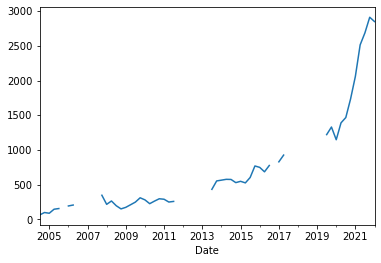

In [143]:
# quarterly
google.asfreq('Q')['Open'].plot()

<AxesSubplot:xlabel='month_name'>

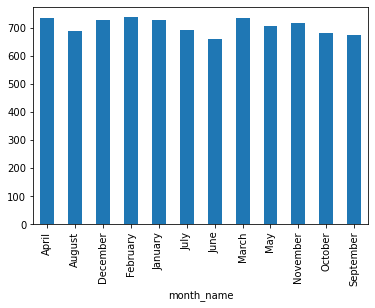

In [145]:
# monthly trend
google.groupby('month_name')['Close'].mean().plot(kind='bar')

<AxesSubplot:xlabel='weekday_name'>

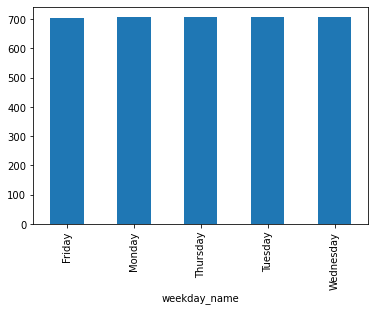

In [146]:
google.groupby('weekday_name')['Close'].mean().plot(kind='bar')

<AxesSubplot:xlabel='quarter'>

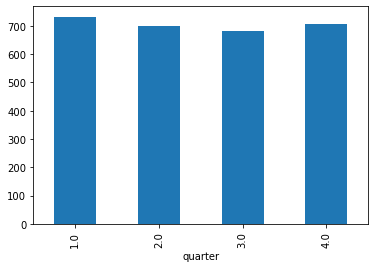

In [147]:
google.groupby('quarter')['Close'].mean().plot(kind='bar')

### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

<AxesSubplot:xlabel='Date'>

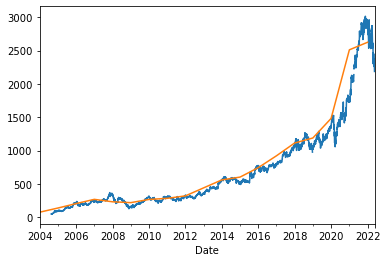

In [157]:
# Downsampling
google.Close.plot() # -> noise make graph looks dirty thats why downsampling is required
# resample is like groupby but specialize for dates
google.Close.resample('Y').mean().plot() # -> it has smoothened out the line

<AxesSubplot:xlabel='Date'>

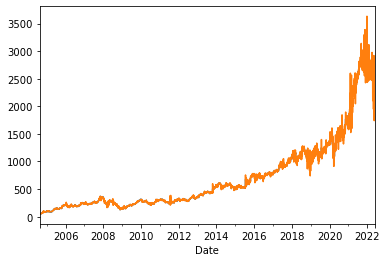

In [169]:
# Upsampling
google.Close.plot()
# it became more complex graph with more noise
google.Close.resample('H').interpolate(method='spline',order=2).plot()

### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data. 

In [186]:
import matplotlib.pyplot as plt

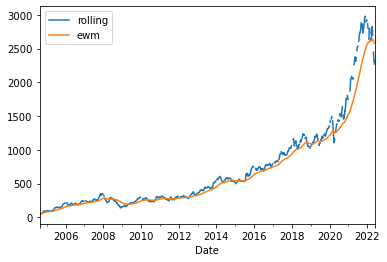

In [189]:
# Rolling window
# google.Close.plot(label='original')
google.Close.rolling(10).mean().plot(label='rolling')
google.Close.ewm(120).mean().plot(label='ewm')
plt.legend()

### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [196]:
# shift
google['Close'].shift(-2)

Date
2004-08-19      54.495735
2004-08-20      52.239197
2004-08-23      52.802086
2004-08-24      53.753517
2004-08-25      52.876804
                 ...     
2022-05-16    2248.020020
2022-05-17    2214.909912
2022-05-18    2186.260010
2022-05-19            NaN
2022-05-20            NaN
Freq: B, Name: Close, Length: 4632, dtype: float64

In [204]:
# shift example
df = pd.read_csv('login.csv',header=None)
df = df[[1,2]]
df.rename(columns={1:'user_id',2:'login_time'},inplace=True)
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [210]:
user_df = df[df['user_id'] == 413]
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df

C:\Users\Aniket\AppData\Local\Temp\ipykernel_20492\839031161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45
...,...,...
2958,413,2017-12-29 18:20:32
2963,413,2017-12-30 13:41:21
2974,413,2018-01-01 15:16:25
2982,413,2018-01-02 18:15:45


In [214]:
user_df['shifted'] = user_df['login_time'].shift(1)
user_df['diff'] = user_df['login_time'] - user_df['shifted']
user_df['diff'].mean()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_20492\1738334941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)
C:\Users\Aniket\AppData\Local\Temp\ipykernel_20492\1738334941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['diff'] = user_df['login_time'] - user_df['shifted']


Timedelta('1 days 15:05:13.384615384')